Name(s): Ashley Yude (acy366) and Danica Padlan (dmp3357)

# Association Analysis

Association analysis uses machine learning to extract frequent itemsets and strong association rules from large datasets. In this assignment you'll be implementing one of the most commonly used algorithms for association rule mining - the Apriori algorithm.

The dataset (`large_retail.txt`) that we are going to use has been adapted from the [Retail Market Basket Dataset](http://fimi.ua.ac.be/data/retail.pdf). This dataset contains transaction records supplied by a Belgian retail supermarket store. Each line in the file represents a separate transaction with the item ids separated by space. The dataset has 3000 transactions and 99 different item ids.

You are also provided with a smaller dataset (`small_retail.txt`) with 9 transactions and 5 different item ids along with the solutions. You can test and debug your implementation on this smaller dataset.

## Apriori Algorithm from scratch

The Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be implementing this algorithm for generating the itemsets that occur enough times to meet the `min_sup` threshold.

**Implementation Hint:**

- Use the `frozenset` data structure in Python, which is similar to `set` in functionality, to represent the itemsets, because `frozenset` is an immutable (hashable) data structure. You can maintain a dictionary that maps from the itemset (a `frozenset`) to its support count.

In [251]:
# Standard imports (you can add additional headers if you wish)
import numpy as np

In [252]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()
        data = [[int(x) for x in line.rstrip().split()] for line in content]
    return data

In [253]:
# Read in the small_retail dataset
small_dataset = load_dataset('small_retail.txt')
small_dataset

[[1, 2, 5],
 [2, 4],
 [2, 3],
 [1, 2, 4],
 [1, 3],
 [2, 3],
 [1, 3],
 [1, 2, 3, 5],
 [1, 2, 3]]

Q1. Implement the function `create_1_itemsets` that takes as input the entire dataset and returns a list of all the candidate 1-itemsets. For example, for `small_retail.txt` it should return:
~~~
[frozenset({1}),
 frozenset({2}),
 frozenset({3}),
 frozenset({4}),
 frozenset({5})]
 ~~~
 Please don't hardcode the item ids, your code should support item ids that are non-sequential.

In [254]:
def create_1_itemsets(dataset):
    unique = []
    c1 = []
    # your code goes here
    
    #double loop to find unique item numbers
    for i in dataset:
        for j in i:
            
            #check if item j is in the array,
            #if not add to the initial list
            if j not in unique: unique.append(j)
    
    #sort unique items list inorder
    unique.sort()
    
    #loop to set each item into a frozen set
    for i in unique:
        
        #create frozenset out of list with 1 object in it
        temp = frozenset({i})
        c1.append(temp)
    
    return c1

In [256]:
#Testing: works!
sets = create_1_itemsets(small_dataset)
sets

[frozenset({1}),
 frozenset({2}),
 frozenset({3}),
 frozenset({4}),
 frozenset({5})]

Q2. Implement function `filter_candidates` that takes as input the candidate itemsets, the dataset, and the minumum support count `min_sup`, and filters out candidates that don't meet the support threshold.

Return a list of all the itemsets that meet `min_sup` (as a list of frozensets) and the support count information for all of them (as a `dict`).

In [257]:
def filter_candidates(candidates, dataset, min_sup):
    retlist = []
    support_data = {}
    # your code goes here
    
    #assuming candidate set list is items of one size
    #double for loop to check through all candidates
    for i in candidates:
        
        #convert frozen_set to list
        cur_list = list(i)
        value = 0
        
        #loop through all datasets
        for j in dataset:
            
            if (all(x in j for x in cur_list)): value += 1
    
    
        #check if total num of list that contain the cur_list, add to dictionary
        if value >= min_sup:
            retlist.append(i)
            support_data.update({i: value})
    
    return retlist, support_data

In [258]:
#Testing: works!
retlist, support_data = filter_candidates(sets, small_dataset, 2)
print(support_data)

{frozenset({1}): 6, frozenset({2}): 7, frozenset({3}): 6, frozenset({4}): 2, frozenset({5}): 2}


Q3. Implement the function `generate_next_itemsets` that takes in frequent itemsets of size `k` and generates candidate itemsets of size `k + 1`.

Use either the F(k-1) x F(k-1) or the F(k-1) x F(1) candidate generation method, then **filter the candidate list based on the apriori principle before returning it.**

In [265]:
def generate_next_itemsets(freq_sets):
    retlist = []
    #loop through all ordered and freq item sets
    for i in range(len(freq_sets)):
        
        #loop through i+1 range
        for j in range(i + 1, len(freq_sets)):
            list1 = list(freq_sets[i])
            list2 = list(freq_sets[j])

            #check if first k-1 items match
            if( list1[0:len(list1)-1] ==  list2[0:len(list2)-1]):

                #if last values aren't matching, combine into list, 
                #make them frozenset, and add to retlist
                if((list1[len(list1)-1] != list2[len(list2)-1])):
                   
                    temp_list = list(set(list1).union(set(list2)))
                    retlist.append(frozenset(temp_list))
                 
    #filter list based on apriori        
    filtered_list = []
    for x in retlist:
        in_set = True
        
        #loop through all items
        for i in range(len(x)):
            # create all possible k-subsets of the candidate itemset
            subset = list(x)[:i] + list(x)[i+1:]
            if frozenset(subset) not in freq_sets:
                in_set = False
                break
        if in_set: filtered_list.append(x)
                
    return filtered_list


In [266]:
# Testing: initial works for min_thresh 2 (10 combos), 6 (3 combos), 7 (0 comboe)
next_itemsets = generate_next_itemsets(retlist)
print(next_itemsets)

[frozenset({1, 2}), frozenset({1, 3}), frozenset({1, 4}), frozenset({1, 5}), frozenset({2, 3}), frozenset({2, 4}), frozenset({2, 5}), frozenset({3, 4}), frozenset({3, 5}), frozenset({4, 5})]


Q4. Implement the function `apriori_freq_itemsets` that takes the entire dataset as input and returns all the frequent itemsets that meet `min_sup`.

In [267]:
def apriori_freq_itemsets(dataset, minsup):
    retlist = []
    support_data = {}
    more_cands = True
    
    #returns all frequent itemsets of all k sizes
    #intially make 1-itemsets
    cands = create_1_itemsets(dataset)
    
#   #loop til no more candidates found
    while more_cands:
    
        #filter all candidates and get their support counts
        filtered_cands, support_counts = filter_candidates(cands, dataset, minsup)
        
        retlist.append(filtered_cands)
        support_data.update(support_counts)

        cands = generate_next_itemsets(filtered_cands)
        
        if len(cands) <= 0:
            more_cands = False
    
    # your code goes here
    return retlist, support_data

In [268]:
#Test
freq_list, support_counts = apriori_freq_itemsets(small_dataset, 2)
support_counts

{frozenset({1}): 6,
 frozenset({2}): 7,
 frozenset({3}): 6,
 frozenset({4}): 2,
 frozenset({5}): 2,
 frozenset({1, 2}): 4,
 frozenset({1, 3}): 4,
 frozenset({1, 5}): 2,
 frozenset({2, 3}): 4,
 frozenset({2, 4}): 2,
 frozenset({2, 5}): 2,
 frozenset({1, 2, 3}): 2,
 frozenset({1, 2, 5}): 2}

Q5. Display the frequent item sets in the form of a table along with their `support` (as a fraction: support count over number of transactions) for the `large_retail.txt` dataset **with a min support count of 300**.

Sample Table Format (tab separated table)

~~~
Sup     Freq Itemset
0.67	[1]
0.44	[1, 2]
(and so on)
...
...
~~~

`support(itemset) = support_count(itemset) / num_total_transactions`.

The `support` and the itemset should be separated by a tab (`'\t'`).

Note that the `support` should be rounded to the nearest 2 decimal places (use `round(sup, 2)`). If a support_fraction only contains 1 decimal place (for example, 0.1), you do not need to add a 0 to the end of it (leaving it as 0.1 is fine).

The itemsets should also be in a sorted order where smaller itemsets should come before larger itemsets and itemsets of the same size should be sorted amongst themselves.

For eg. 
~~~~
[1, 2] should come before [1, 2, 3]
[1, 2, 3] should come before [1, 2, 4]
[1, 2, 3] should come before [1, 4, 5]
[1, 2, 3] should come before [2, 3, 4]
~~~~

Note that **this order is very important for grading!** 

The output also shouldn't contain any duplicates. 

The sample output for the `small_retail.txt` dataset with `min_sup` set to 2 is:

~~~~
Sup     Freq Itemset
0.67	[1]
0.78	[2]
0.67	[3]
0.22	[4]
0.22	[5]
0.44	[1, 2]
0.44	[1, 3]
0.22	[1, 5]
0.44	[2, 3]
0.22	[2, 4]
0.22	[2, 5]
0.22	[1, 2, 3]
0.22	[1, 2, 5]
~~~~


In [269]:
def print_table(sup_count, total_transac):
    print("Sup\t Freq Itemset")
    for i in sup_count:
        cur_support = sup_count.get(i) / total_transac
        print(round(cur_support,2), "\t", sorted(list(i)))

In [273]:
# Testing on small_retail.txt (IT WORKS)
large_dataset = load_dataset('large_retail.txt')
freq_list, large_support_counts = apriori_freq_itemsets(large_dataset, 300)
print_table(large_support_counts, len(large_dataset))

print(type(large_support_counts))

Sup	 Freq Itemset
0.1 	 [31]
0.14 	 [32]
0.11 	 [36]
0.26 	 [38]
0.53 	 [39]
0.22 	 [41]
0.47 	 [48]
0.11 	 [60]
0.11 	 [65]
0.11 	 [89]
0.14 	 [32, 39]
0.15 	 [38, 39]
0.13 	 [38, 48]
0.14 	 [39, 41]
0.33 	 [39, 48]
0.18 	 [41, 48]
0.14 	 [39, 41, 48]
<class 'dict'>


Q6. Find the closed frequent item sets. Display results for the `large_retail.txt` dataset in the same format as specified in Q5.

The results for the `small_retail` dataset are as follows:

~~~~
Sup	Freq Itemset
0.0	[1]
0.0	[2]
0.0	[3]
0.0	[1, 2]
0.0	[1, 3]
0.0	[2, 3]
0.0	[2, 4]
0.0	[1, 2, 3]
0.0	[1, 2, 5]
~~~~

In [274]:
def closed_freq_itemsets(support_data):

    # Dictionary since we need to store support counts with the frequent items
    closed_freq_sets = {}
    # use to loop through closed set to find if curr is a superset
    
    #loop through all the keys in 
    for i, i_sup_counts in support_data.items():
        
        # Since support_data is always in order, it will never be a subset of anything in closed_freq_sets
        #check if its a superset of anything else in the list
        for j, j_sup_counts in list(closed_freq_sets.items()):
            
            if (set(j).issubset(set(i))):
                
                # if j has less counts than i, remove from closed list
                if (j_sup_counts <= i_sup_counts):
                    del closed_freq_sets[j]
                    
        # add current to closed_freq_sets
        closed_freq_sets.update({i:support_data.get(i)})
            
                    
    return closed_freq_sets


In [275]:
#Testing with small_retail/dataset (IT WORKS)
# closed = closed_freq_itemsets(support_counts)
# print("small dataset closed_freq_itemsets")
# print_table(closed, len(small_dataset))

#Testing with large
large_closed = closed_freq_itemsets(large_support_counts)
print("large dataset closed_freq_itemsets")
print_table(large_closed, len(large_dataset))

large dataset closed_freq_itemsets
Sup	 Freq Itemset
0.1 	 [31]
0.11 	 [36]
0.26 	 [38]
0.53 	 [39]
0.22 	 [41]
0.47 	 [48]
0.11 	 [60]
0.11 	 [65]
0.11 	 [89]
0.14 	 [32, 39]
0.15 	 [38, 39]
0.13 	 [38, 48]
0.33 	 [39, 48]
0.18 	 [41, 48]
0.14 	 [39, 41, 48]


## Extra Credit (+5 points)

Q7. Now, generate the strong rules from the frequent itemsets. Given a dictionary of frequent itemsets and their supports, generate all the rules having confidence above some provided `min_conf` threshold. Display the rules in the form of a table.

Sample table format (tab separated table):

~~~
Sup     Conf    Rule
0.44	0.67	[1] -> [2]
0.22	1.0	 [5] -> [1, 2]
0.22	1.0	 [2, 5] -> [1]
(and so on)
...
...
~~~

Rule confidence should be rounded to the nearest 2 decimal places (use `round(conf, 2)`). This table should also be tab (`'\t'`) separated. The rules should be displayed in a sorted order. If a rule is given as `LHS -> RHS` then the rules for which `len(LHS)` is lesser should appear first. If the `len(LHS)` is equal for two rules then rules for which `len(RHS)` is lesser should appear first. If both `len(LHS)` and `len(RHS)` is equal then the rules should be sorted based on LHS first and then based on RHS.

~~~~
Note:
LHS (Left Hand Side)
RHS (Right Hand Side)
~~~~

For eg.
~~~~
[3] -> [2] should come before [1, 3] -> [4]
[4] -> [2] should come before [2] -> [3, 4]
[1, 3] -> [2] should come before [1, 5] -> [2]
[1, 2] -> [3] should come before [1, 2] -> [5]
~~~~

Note that **this order is important for grading**. 

The sample output for the `small_retail` dataset with `min_conf = 0.5` is:

~~~~
Sup	 Conf	Rule
0.44	0.67	[1] -> [2]
0.44	0.67	[1] -> [3]
0.44	0.57	[2] -> [1]
0.44	0.57	[2] -> [3]
0.44	0.67	[3] -> [1]
0.44	0.67	[3] -> [2]
0.22	1.0	 [4] -> [2]
0.22	1.0	 [5] -> [1]
0.22	1.0	 [5] -> [2]
0.22	1.0	 [5] -> [1, 2]
0.22	0.5	 [1, 2] -> [3]
0.22	0.5	 [1, 2] -> [5]
0.22	0.5	 [1, 3] -> [2]
0.22	1.0	 [1, 5] -> [2]
0.22	0.5	 [2, 3] -> [1]
0.22	1.0	 [2, 5] -> [1]
~~~~

In [276]:
def print_table_with_rules(sup_count, total_transac, lhs, rhs, conf):
    print("Sup\t Conf\t Rule")
    for i in sup_count:
        cur_support = sup_count.get(i) / total_transac
        print(round(cur_support,2), "\t", conf[i], "\t", lhs[i], " -> ", rhs[i])

In [277]:
def generate_rules(support_data, minconf):
    pass
    # your code goes here

In [278]:
# lhs, rhs, conf = generate_rules(support_counts, 0.5)
# print_table_with_rules(rules_sup_count, len(small_dataset), lhs, rhs, conf)

## Part 2 - Association Analysis using MLXtend

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

You will need to install the `MLxtend` library. There are several ways of doing this; you can follow the instructions below, or see the setup guide  [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda. 

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip. 
Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter (which is why you should use Conda instead of pip, if you downloaded Anaconda).

Open a command prompt / terminal window and type:

`pip3 install mlxtend`

### Google Colab

If you are using Google Colab, you can install MLXtend via a pip install command with an exclamation point in front of it, in one of your notebook cells. The exclamation points allows you to put shell commands inside of Colab. 

In a cell in your Colab notebook, type:

`!pip install mlxtend`


## Dataset
For the second part of this assignment, the data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

In this part, you'll be running the Apriori algorithm from the MLxtend library to generate the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets, you'll find association rules that have confidence above the `min_conf` threshold.

In [279]:
# Standard imports (you can add additional headers if you wish)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [280]:
%matplotlib inline

In [281]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [282]:
dataset = load_dataset('BreadBasket_DMS.csv')

# ** NOTE: dataset is a 2D list (not a dataframe!) **

print("Num transactions:", len(dataset))
#Print the first 10 transactions
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

Q8. Data Cleaning: Many transactions in the dataset include the item "NONE." First, find and remove all the "NONE" items from the dataset. There are some transactions that only contain "NONE," so removing "NONE" will leave some transactions as empty lists. Remove all the empty lists as well. 

Once you have removed the NONEs, find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

In [283]:
# Remove NONEs

# [:] makes a copy of dataset so we aren't skipping over values, but still modifying values in original dataset
for transaction in dataset[:]:
    # Remove all 'NONE's in the transaction & update in original dataset
    transaction[:] = (item for item in transaction if item != "NONE")
    
    # If transaction is now empty, remove from original dataset
    if len(transaction) <= 0:
        dataset.remove(transaction)

Top 10 Items with Support Counts
frozenset({'Coffee'}) , Support Counts: 4528
frozenset({'Bread'}) , Support Counts: 3097
frozenset({'Tea'}) , Support Counts: 1350
frozenset({'Cake'}) , Support Counts: 983
frozenset({'Pastry'}) , Support Counts: 815
frozenset({'Sandwich'}) , Support Counts: 680
frozenset({'Medialuna'}) , Support Counts: 585
frozenset({'Hot chocolate'}) , Support Counts: 552
frozenset({'Cookies'}) , Support Counts: 515
frozenset({'Brownie'}) , Support Counts: 379


<BarContainer object of 10 artists>

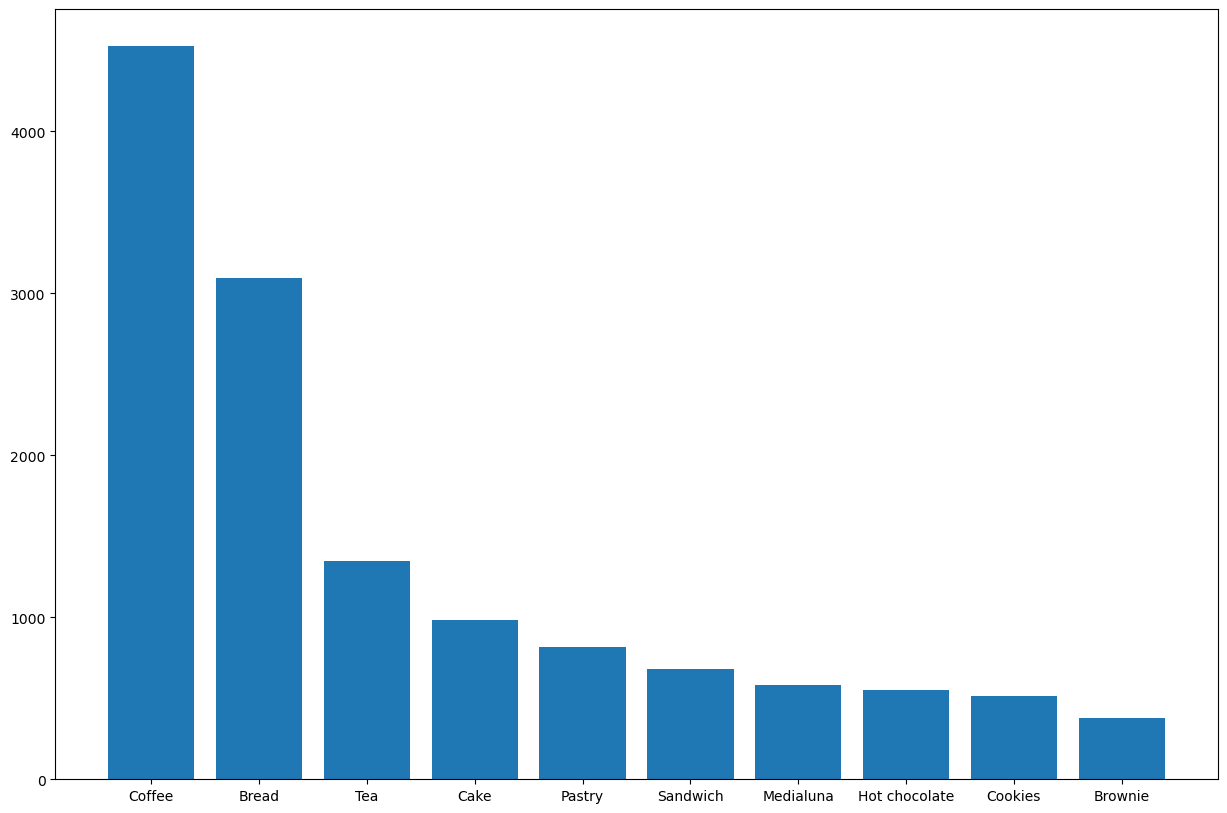

In [284]:
from itertools import islice

# Display the total number of transactions for each of the top 10 selling items
unique_set = create_1_itemsets(dataset)

retlist, support_data = filter_candidates(unique_set, dataset, 0)

sorted_transac = dict(sorted(support_data.items(), key=lambda x:x[1], reverse=True))

print("Top 10 Items with Support Counts")
top_10_items = []
top_10_vals = []
for i in islice(sorted_transac,  10):
    print(i, ", Support Counts:", sorted_transac.get(i))
    top_10_items.append(list(i)[0])
    top_10_vals.append(sorted_transac.get(i))
    
#create bar chart
plt.figure(figsize=(15, 10)) 
plt.bar(top_10_items, top_10_vals)

Q9. 

a.) Using `mlxtend.preprocessing.TransactionEncoder`, transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction. If the first transaction contained ['Crepe', 'Jam'], this would correspond to the first row in the encoded table. 

<img src="table.png">

Print the `shape` of the resulting encoded numpy array.

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform one-hot encoded transactions back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [285]:
te = TransactionEncoder()

# Transform into array
te_ary = te.fit(dataset).transform(dataset)
print(te_ary.shape)

# Transform back
print("First 5 after inverse_transform")
te.inverse_transform(te_ary[:5])

(9465, 94)
First 5 after inverse_transform


[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry']]

Q10. Convert the encoded numpy array from Q4 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe. 

In [286]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Q11. Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1% (0.01). Display these itemsets along with their support values.

In [287]:
df_ap = apriori(df, min_support=0.01)
print(df_ap)

     support      itemsets
0   0.036344           (2)
1   0.016059           (6)
2   0.327205          (11)
3   0.040042          (14)
4   0.103856          (15)
..       ...           ...
56  0.023666      (87, 23)
57  0.014369      (73, 83)
58  0.010037  (11, 23, 15)
59  0.011199  (65, 11, 23)
60  0.010037  (83, 23, 15)

[61 rows x 2 columns]


Q12. Use `mlxtend.frequent_patterns.fpmax` to find and display all of the maximal frequent itemsets along with their support values. 

In [288]:
from mlxtend.frequent_patterns import fpmax

fpmax(df, min_support=0.01)

,support,itemsets
0,0.010460,(72)
1,0.010565,(46)
2,0.012995,(18)
3,0.013207,(50)
4,0.014157,(57)
5,0.015003,(49)
6,0.015003,(40)
7,0.015425,(86)
8,0.016059,(6)
9,0.010882,"(79, 23)"


Q13. Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q11.

In [289]:
from mlxtend.frequent_patterns import association_rules

association_rules(df_ap, metric="confidence", min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(2),(11),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
1,(2),(23),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
2,(14),(11),0.040042,0.327205,0.010777,0.269129,0.822508,-0.002326,0.920538,-0.183536
3,(11),(23),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
4,(26),(11),0.054411,0.327205,0.014474,0.266019,0.813004,-0.003329,0.916638,-0.195651
5,(55),(11),0.061807,0.327205,0.016904,0.273504,0.835879,-0.003319,0.926082,-0.173062
6,(65),(11),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
7,(14),(23),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
8,(15),(23),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
9,(26),(23),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


Q14. An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. 

Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying min_conf between 0 and 1 with increments of 0.1. Notice what happens when you increase the confidence level.

' The number of rules decreases as we increase the min confidence threshold '

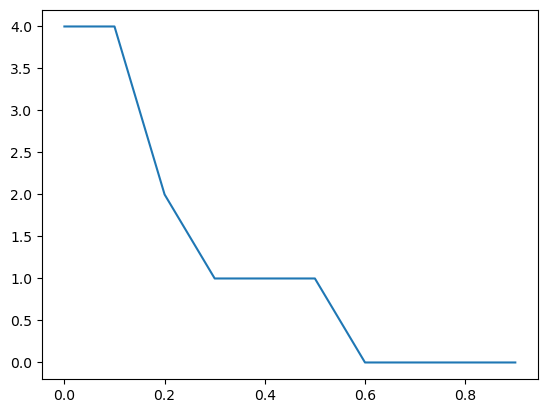

In [290]:
# frequent itemsets with minimum support of 0.5%
freq = apriori(df, min_support=0.05)

num_rules = []
thresh = []

for i in np.arange(0,1,0.1):
    
    current_rules = association_rules(freq, metric="confidence", min_threshold=i)
    num_rules.append(len(current_rules))
    thresh.append(i)
    
# plot the number of rules generated
plt.plot(thresh, num_rules)

''' The number of rules decreases as we increase the min confidence threshold ''' 

Q15. What value would you choose for the minimum confidence threshold based on the previous plot? Explain why as a comment. 

Display the rules generated for the your chosen value. Take a look at the generated rules. Are they interesting? As a comment, explain why or why not.

In [291]:
''' We would choose the minimum confidence threshold to be .30 because it is the highest value we can generate rules at.
That means the items we are correlating with the purchase of others has a high correlation. So our rule is meaningful.
'''

#Display rules of 0.3 threshold
print(association_rules(freq, metric="confidence", min_threshold=0.3))

'''The rule we generated may not have high support and confidence values, but their lift shows that these
items have a strong implication correlation'''

  antecedents consequents  antecedent support  consequent support   support  \
0        (15)        (23)            0.103856            0.478394  0.054728   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.526958  1.101515  0.005044    1.102664        0.10284  


'The rule we generated may not have high support and confidence values, but their lift shows that these\nitems have a strong implication correlation'